In [4]:
import pandas as pd
# import wget
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Download the data (public github)
# !wget -N https://github.com/fiddler-labs/p2p-lending-data/raw/refs/heads/master/raw_data/accepted_2007_to_2018Q3.csv.gz

In [5]:
df = pd.read_csv('accepted_2007_to_2018Q3.csv.gz')

C:\Users\rbrul\AppData\Local\Temp\ipykernel_33308\2329708970.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accepted_2007_to_2018Q3.csv.gz')


In [6]:
pd.set_option('display.max_columns', None)
print(df.columns.tolist())
print(f'Total number of columns: {len(df.columns)}')

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

In [7]:
df.groupby(['loan_status']).size()

loan_status
Charged Off                                             254777
Current                                                 822105
Default                                                     32
Does not meet the credit policy. Status:Charged Off        761
Does not meet the credit policy. Status:Fully Paid        1988
Fully Paid                                             1011841
In Grace Period                                          12458
Late (16-30 days)                                         5442
Late (31-120 days)                                       22852
dtype: int64

In [8]:
df = df[df['loan_status'].isin(['Charged Off', 'Fully Paid'])]

In [9]:
df.groupby(['loan_status']).size()

loan_status
Charged Off     254777
Fully Paid     1011841
dtype: int64

**Your code below**

*   Reduce the overall data set to 200K rows or less
*   Split your data for training / testing
*   Build at least two models with `loan_status` as the target
*   Report on the model's performance
*   Report on the model's drivers (feature importance / effects)

Plant 2 flaws in this notebook.  Do not "give away" the answers here.  This notebook should appear, at first glance, to create a viable model.

Make a note of your flaws and be prepared to talk about how the code / results look when they are "fixed".  You will need to talk about those in the final presentation.

In [14]:
import pickle

# Replace 'your_file.pkl' with the path to your pickle file
file_path = "C:/Users/rbrul/Documents/GitHub/DSBA6010/Final_Project/clean_df_for_eda.pkl"
# file_path = "/Users/jakebrulato/Documents/GitHub/DSBA6010/Final_Project/clean_df_for_eda.pkl"
# file_path = '/Users/jakebrulato/Documents/GitHub/DSBA6010/Final_Project/clean_df_5pct_subset.pkl'

# Open the pickle file in read-binary mode
with open(file_path, 'rb') as file:
    data = pickle.load(file)

# The 'data' variable now contains the loaded object
data
data = data.sample(n=200000,random_state=42)
data2 = data.sample(n=50000,random_state=42)
data2.to_pickle('clean_df_50k.pkl')
data2.to_csv('clean_df_50k.csv')



# DO THE NON COMPLEX MODELS

## Non Complex 

Best Logistic Regression Parameters: {'classifier__C': 10, 'classifier__solver': 'lbfgs'}
Logistic Regression: Accuracy = 0.7974666666666667 ROC AUC = 0.7046113578367916
Best Random Forest Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Random Forest: Accuracy = 0.7976666666666666 ROC AUC = 0.7082769564230497


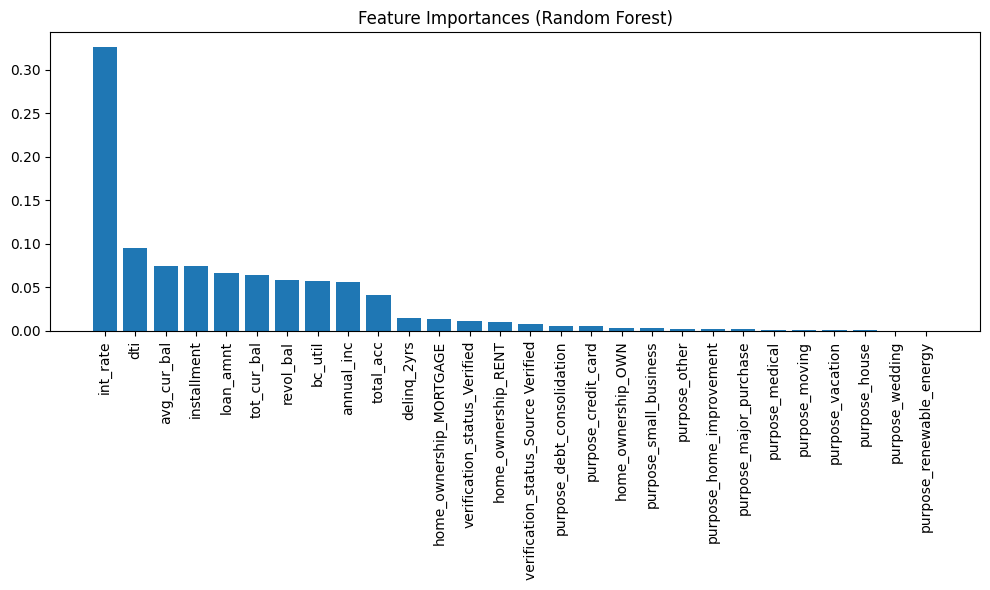

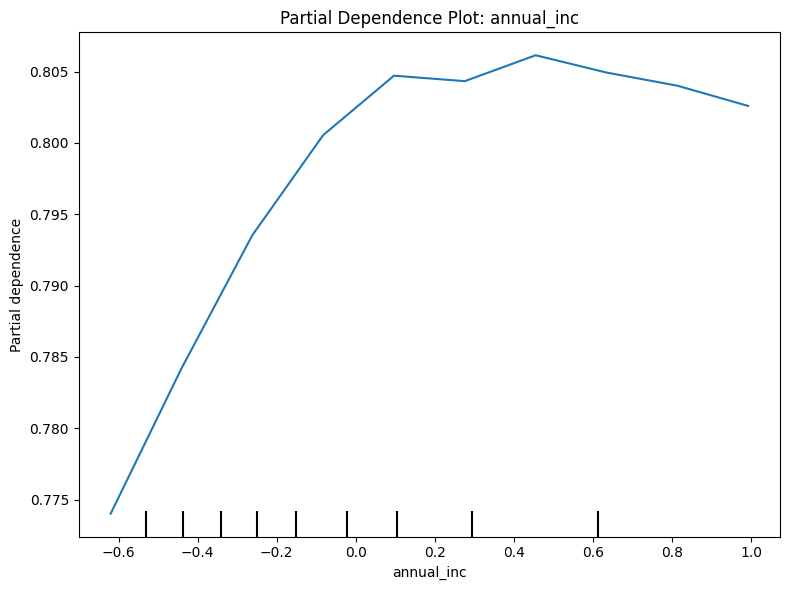

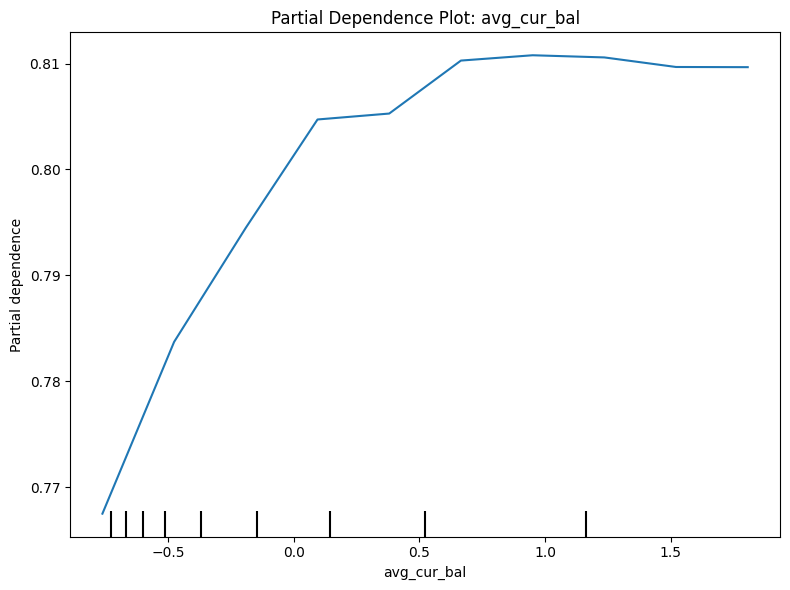

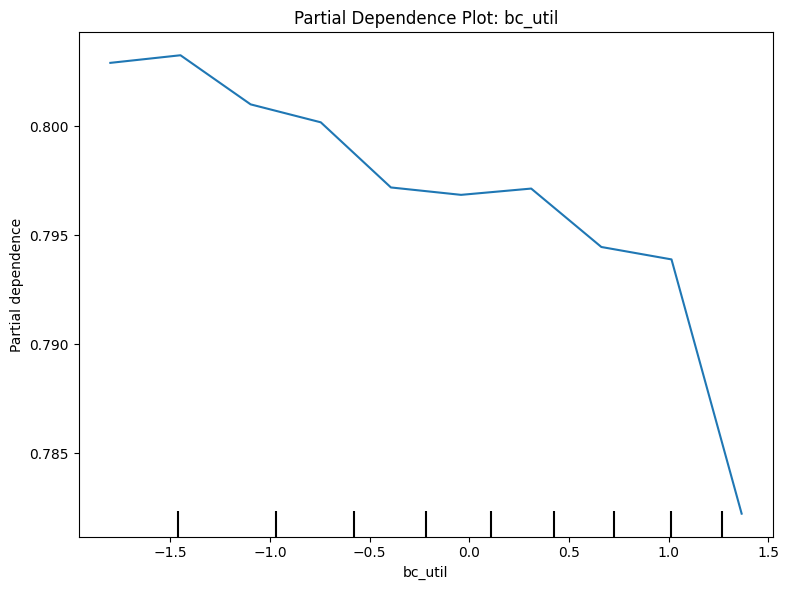

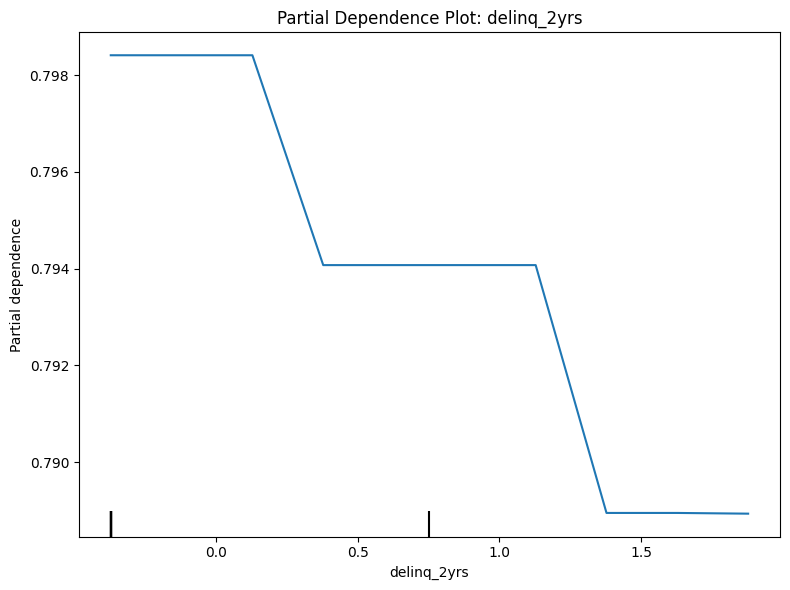

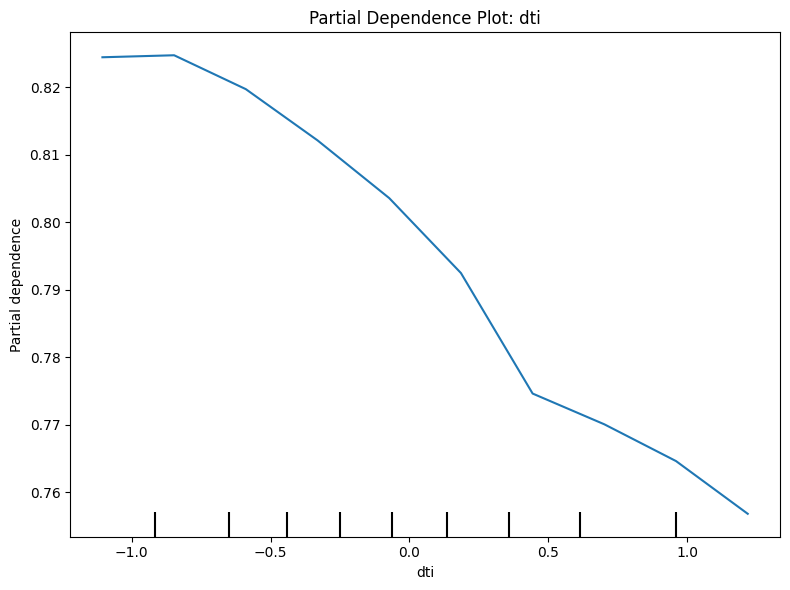

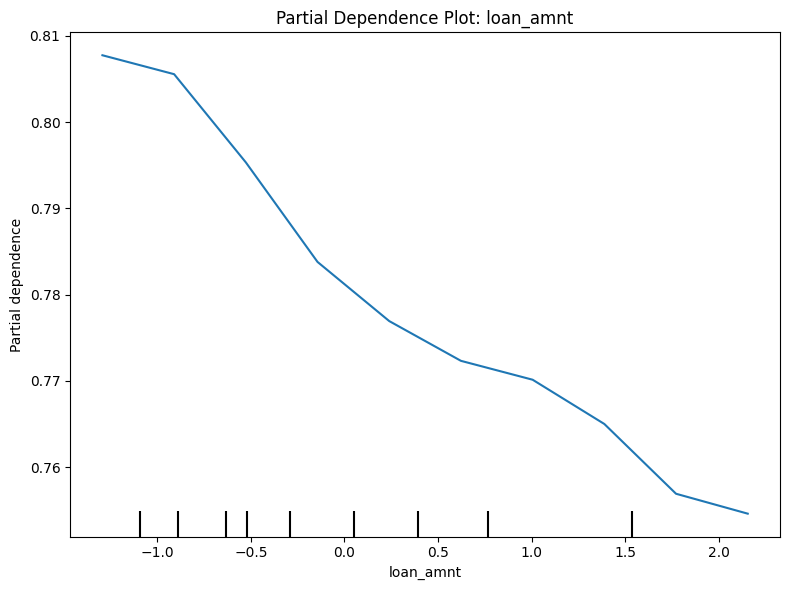

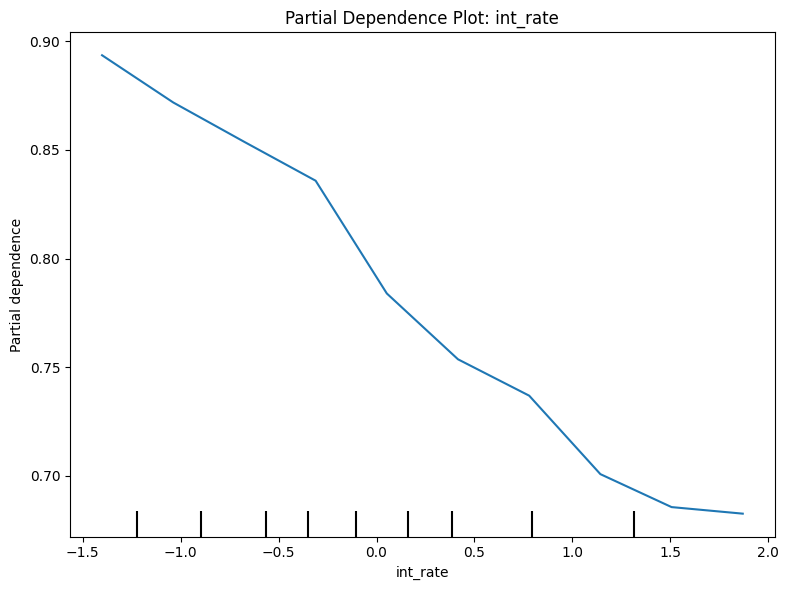

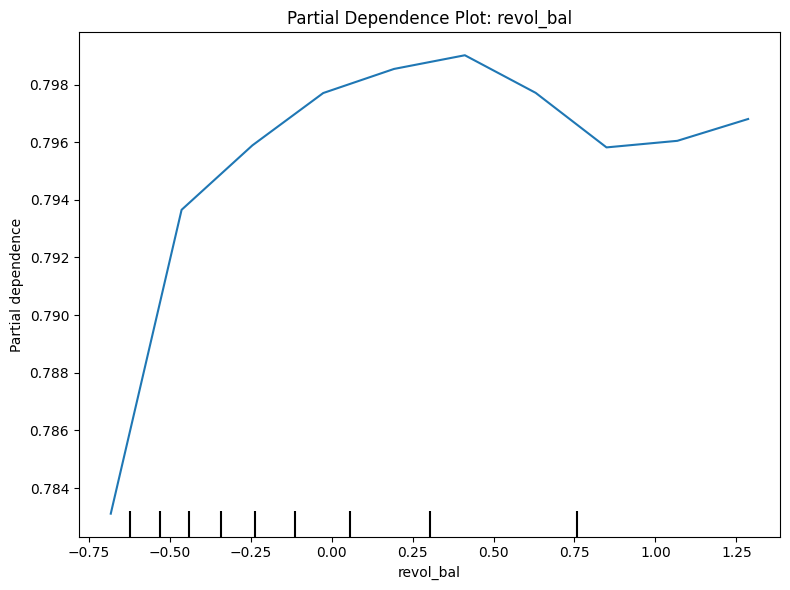

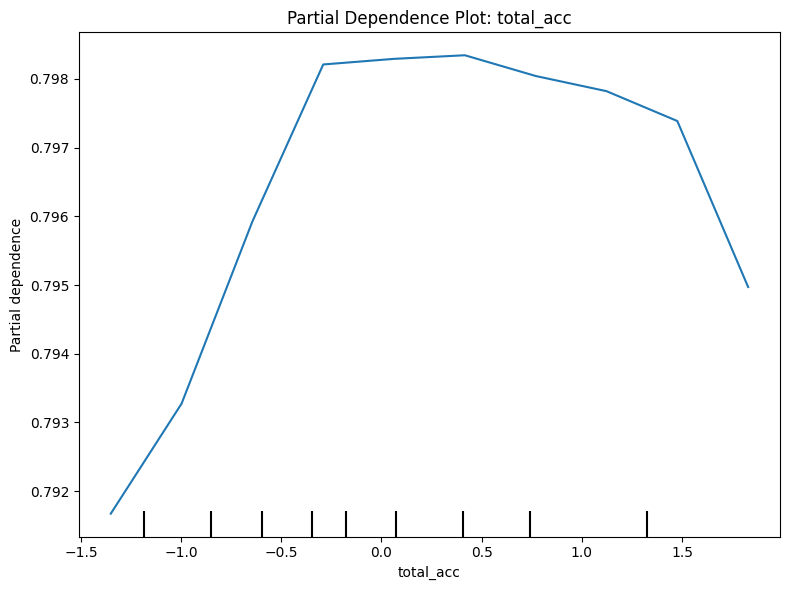

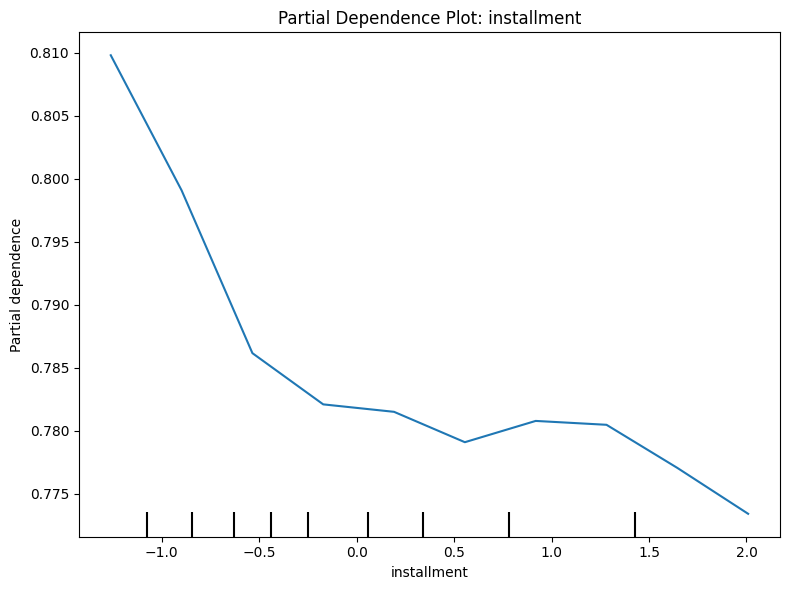

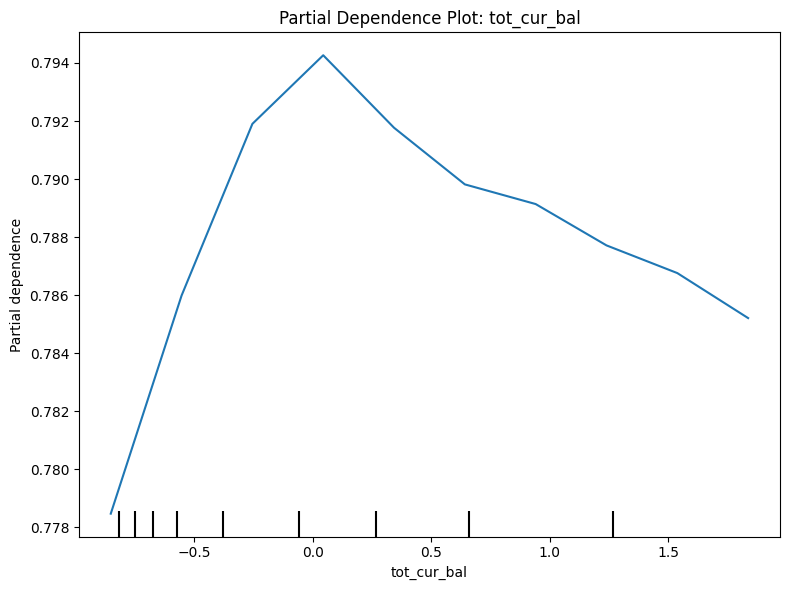

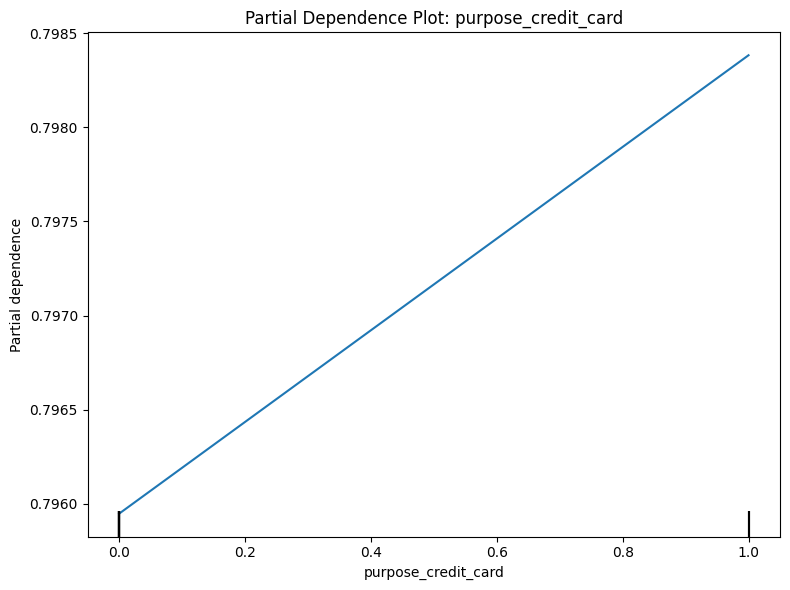

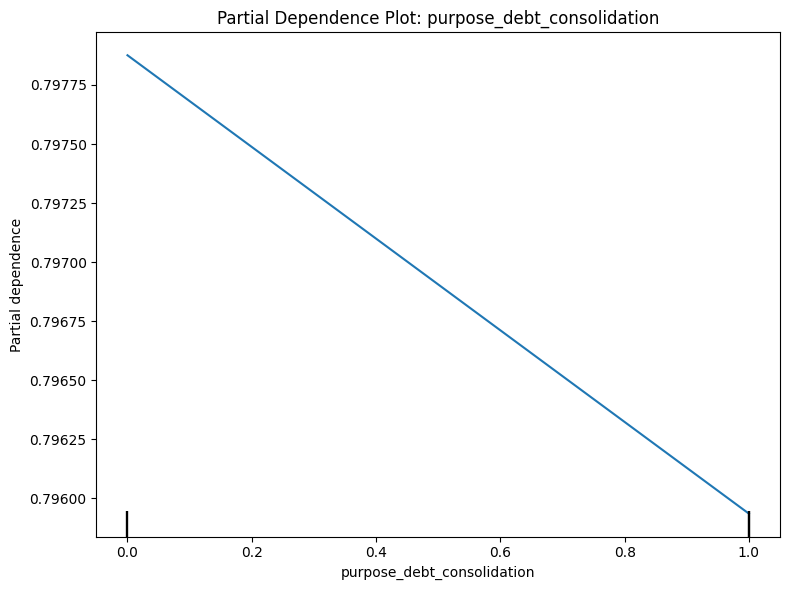

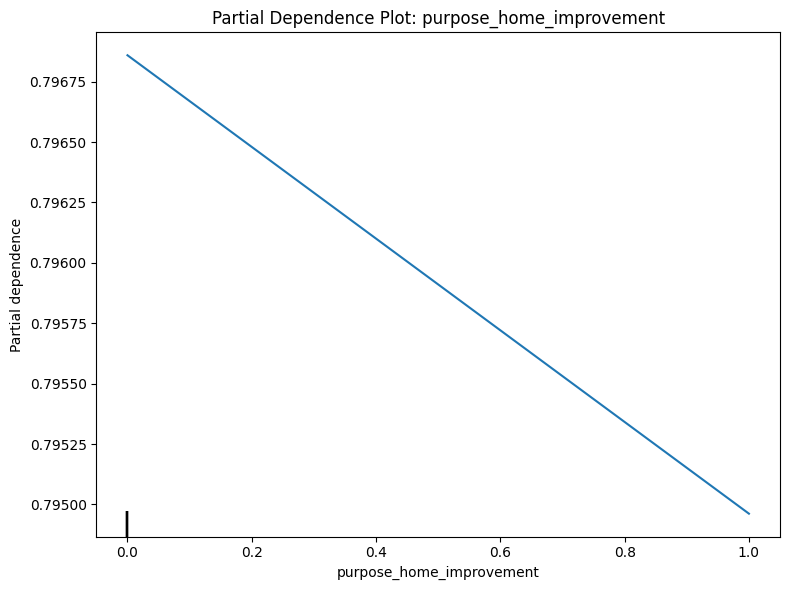

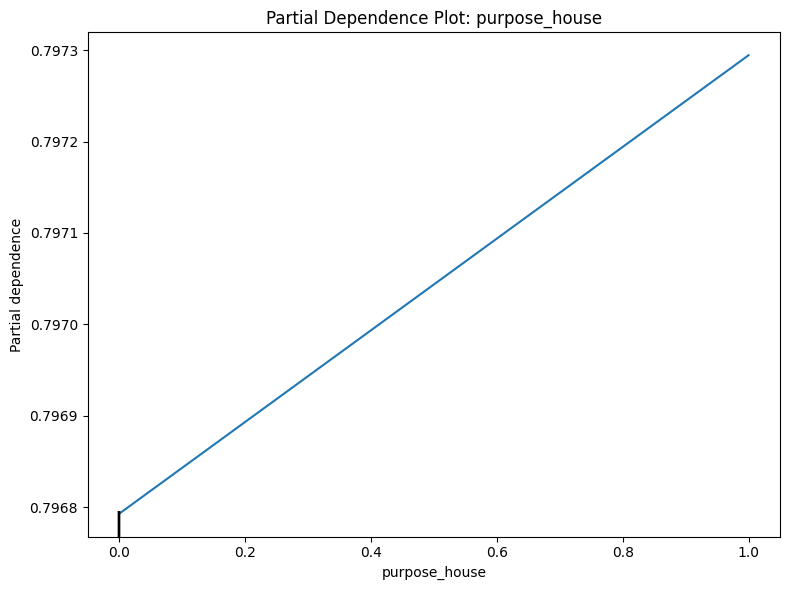

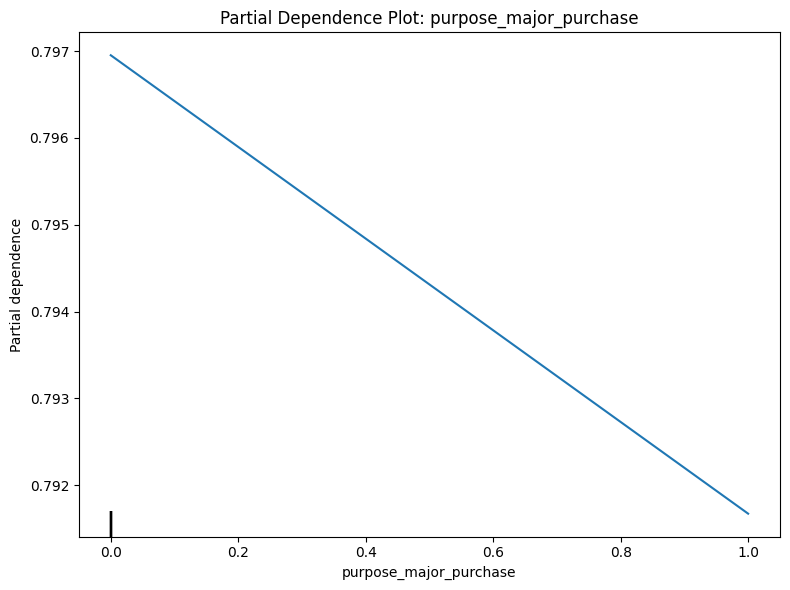

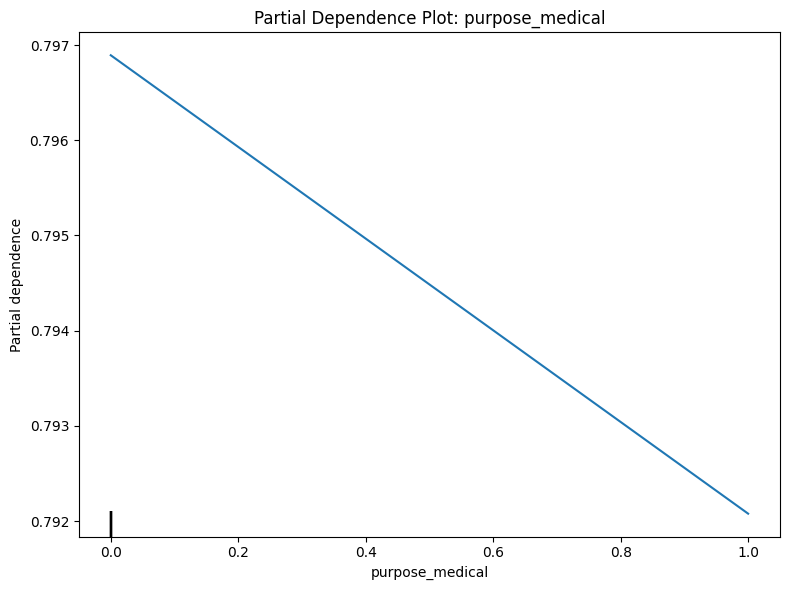

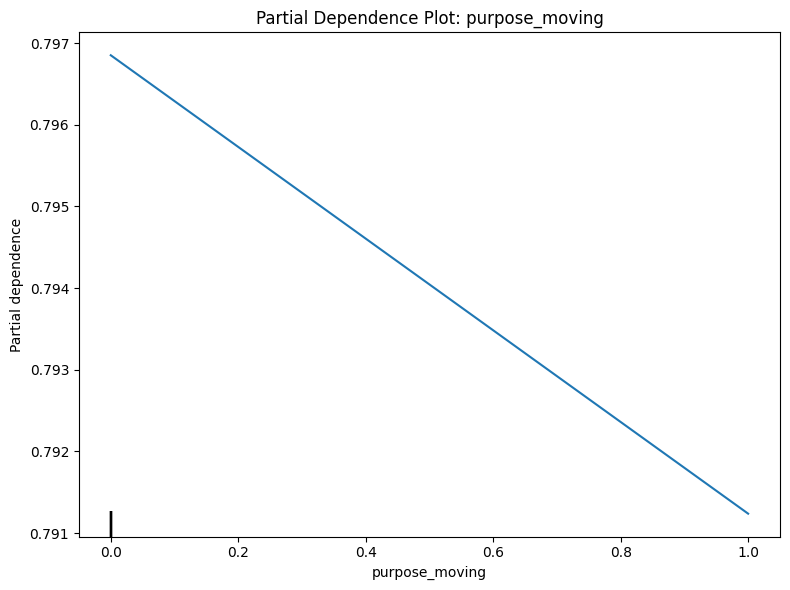

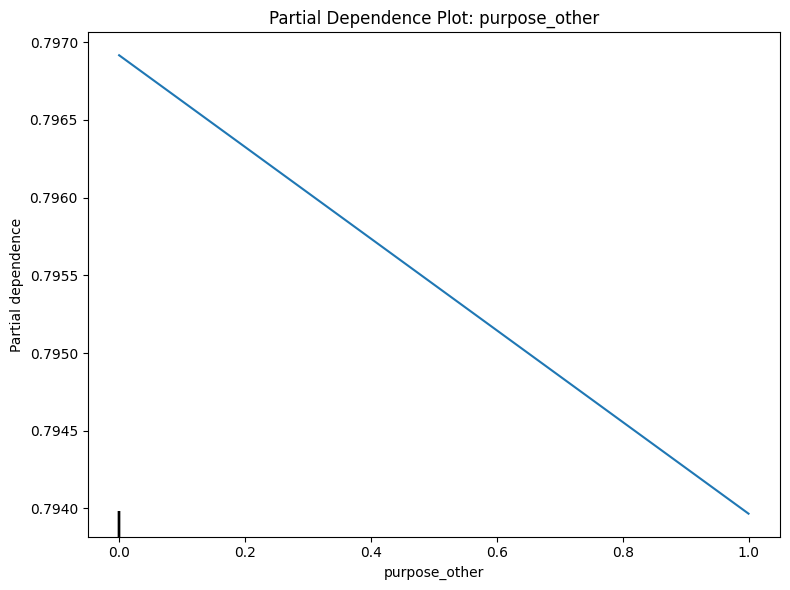

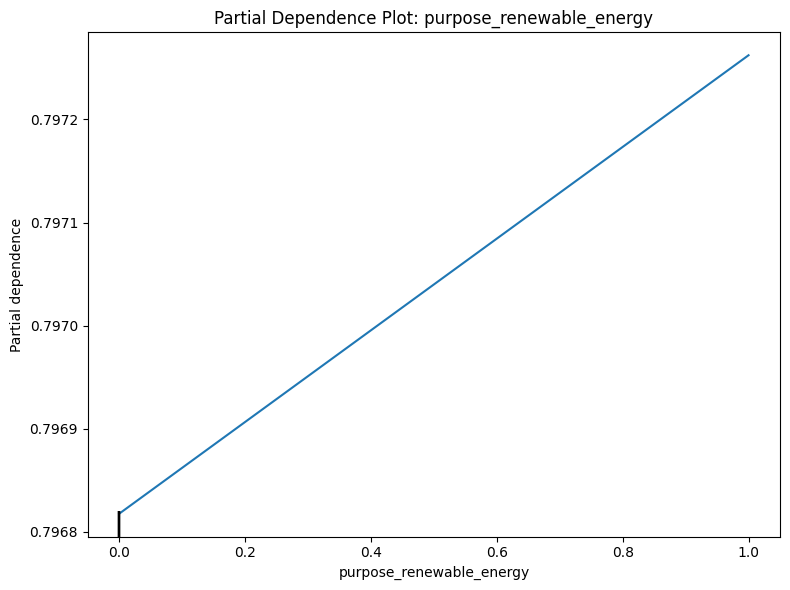

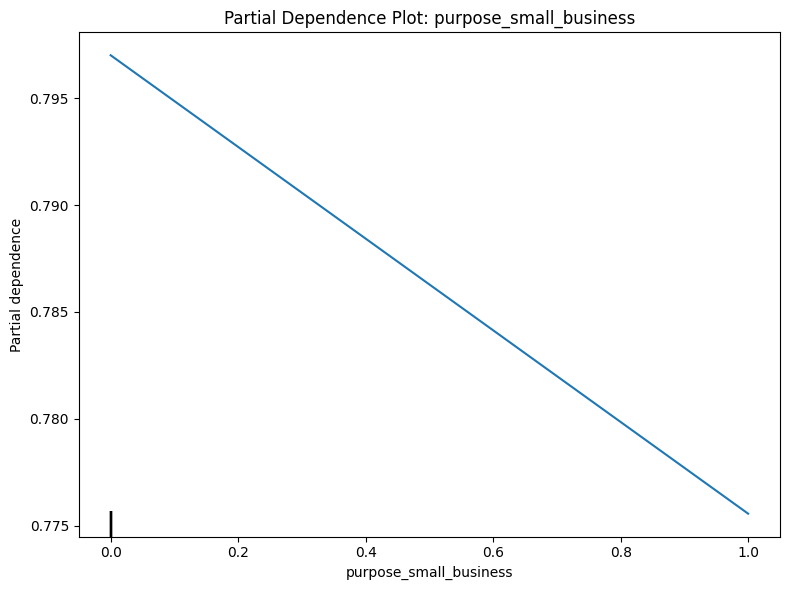

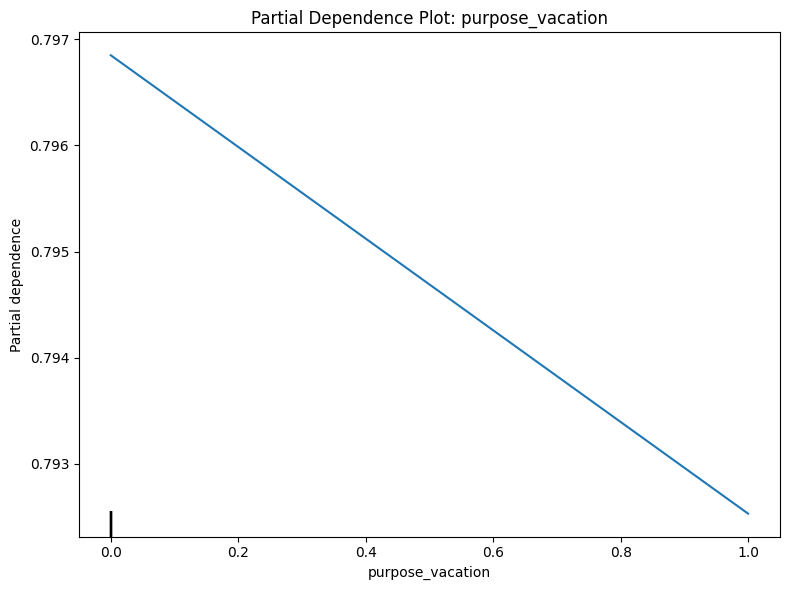

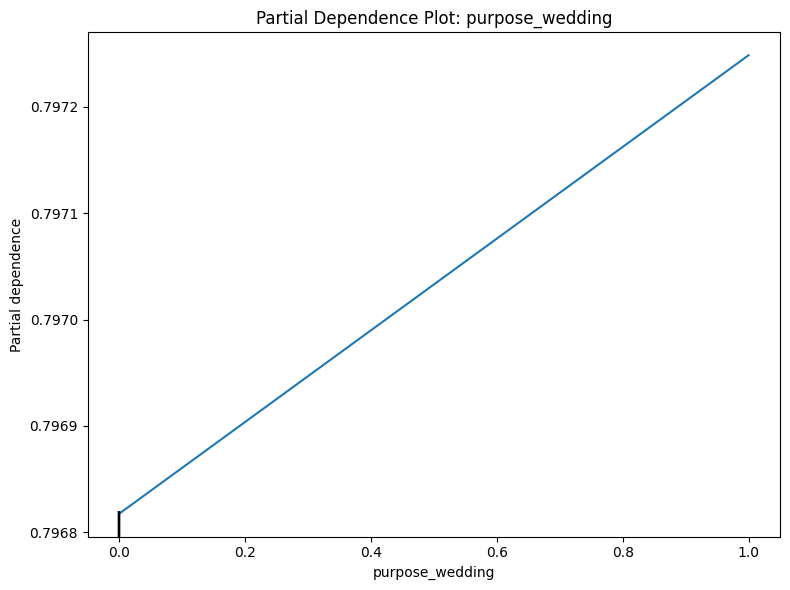

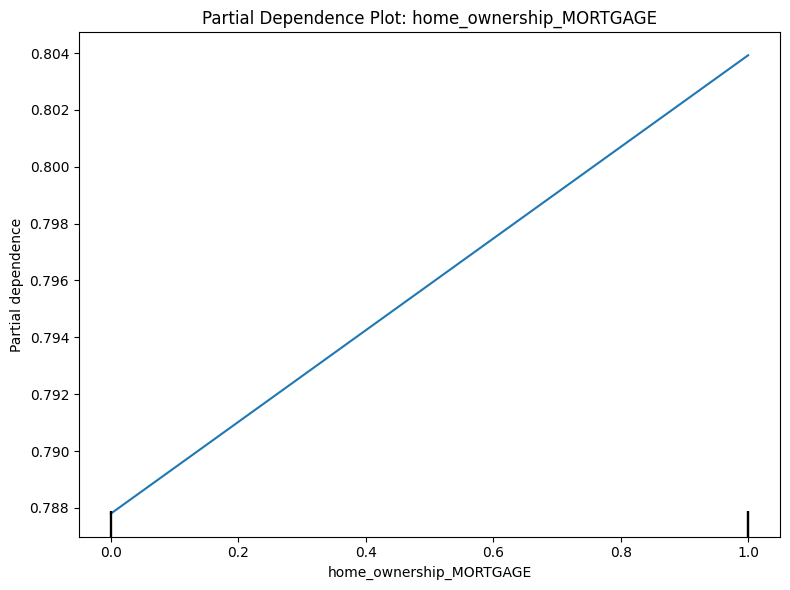

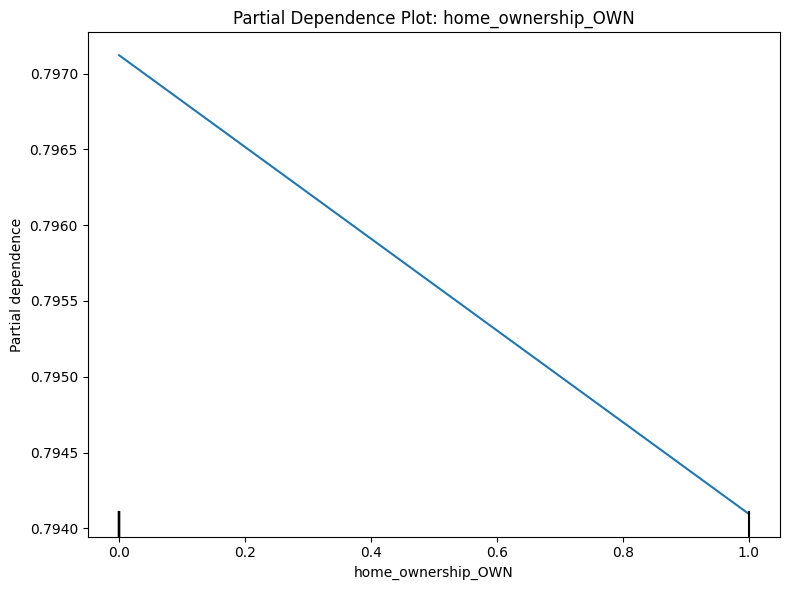

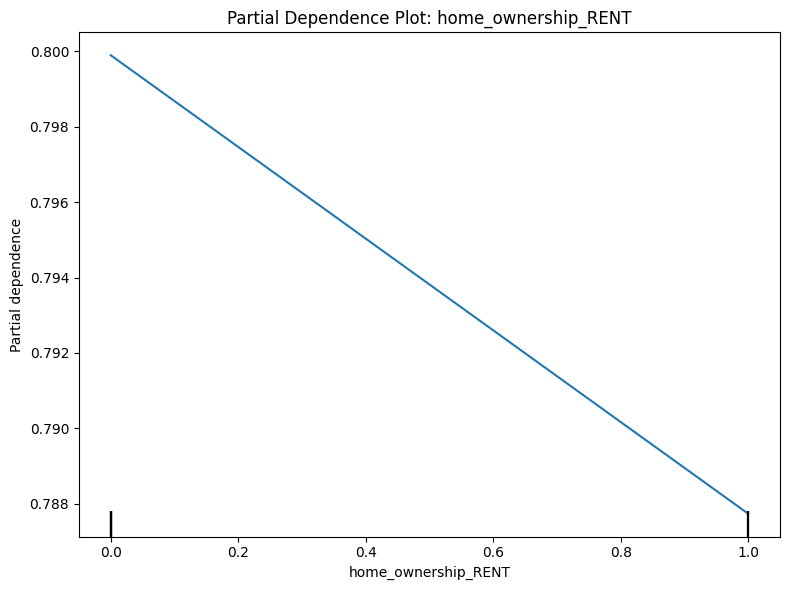

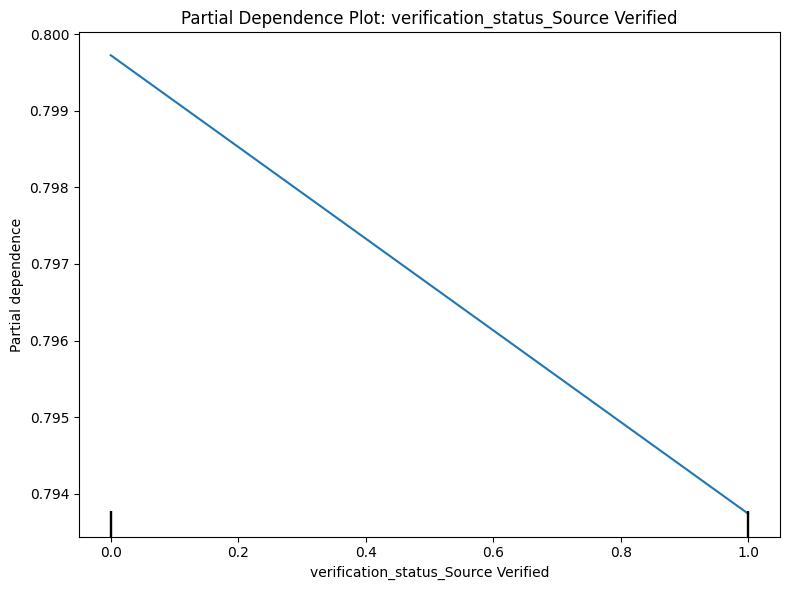

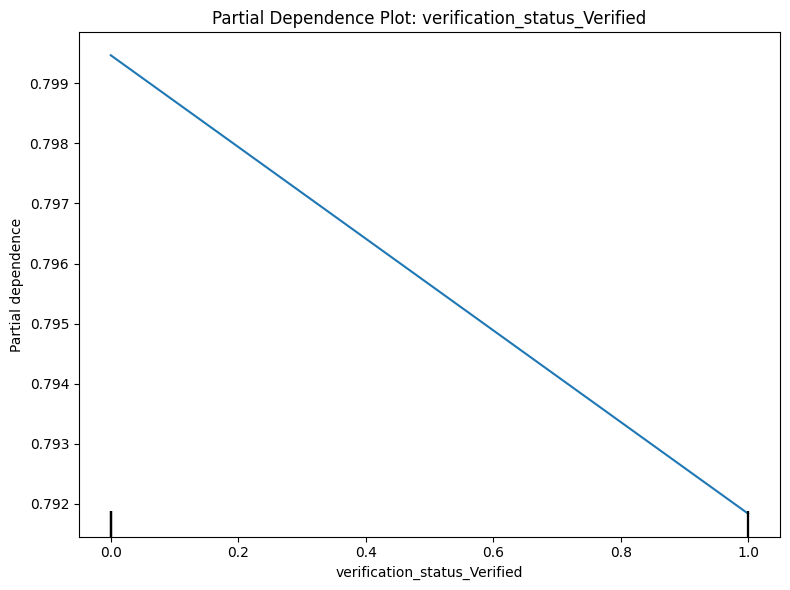

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import numpy as np

# Selecting significant columns
significant_columns = [
    'annual_inc', 'avg_cur_bal', 'bc_util', 'delinq_2yrs', 'dti', 'loan_amnt',
    'purpose', 'home_ownership', 'verification_status', 'int_rate',
    'revol_bal', 'total_acc', 'installment', 'tot_cur_bal', 'fully_paid'
]
filtered_data = data[significant_columns].copy()

# Splitting data into features (X) and target (y)
X = filtered_data.drop(columns=['fully_paid'])
y = filtered_data['fully_paid']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Defining categorical and numerical columns
categorical_features = ['purpose', 'home_ownership', 'verification_status']
numerical_features = [
    'annual_inc', 'avg_cur_bal', 'bc_util', 'delinq_2yrs', 'dti', 'loan_amnt',
    'int_rate', 'revol_bal', 'total_acc', 'installment', 'tot_cur_bal'
]

# Preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Logistic Regression pipeline
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Random Forest pipeline
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define hyperparameter grids
logistic_param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['liblinear', 'lbfgs']
}

random_forest_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Grid search for Logistic Regression
logistic_grid_search = GridSearchCV(logistic_pipeline, logistic_param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
logistic_grid_search.fit(X_train, y_train)

# Grid search for Random Forest
random_forest_grid_search = GridSearchCV(random_forest_pipeline, random_forest_param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
random_forest_grid_search.fit(X_train, y_train)

# Best models
best_logistic_model = logistic_grid_search.best_estimator_
best_random_forest_model = random_forest_grid_search.best_estimator_

# Predictions
y_pred_logistic = best_logistic_model.predict(X_test)
y_pred_rf = best_random_forest_model.predict(X_test)
y_pred_logistic_proba = best_logistic_model.predict_proba(X_test)[:, 1]
y_pred_rf_proba = best_random_forest_model.predict_proba(X_test)[:, 1]

# Evaluate models
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
logistic_roc_auc = roc_auc_score(y_test, y_pred_logistic_proba)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf_proba)

# Output Evaluation Metrics
print("Best Logistic Regression Parameters:", logistic_grid_search.best_params_)
print("Logistic Regression: Accuracy =", logistic_accuracy, "ROC AUC =", logistic_roc_auc)
print("Best Random Forest Parameters:", random_forest_grid_search.best_params_)
print("Random Forest: Accuracy =", rf_accuracy, "ROC AUC =", rf_roc_auc)

# Feature Importances from Random Forest
rf_classifier = best_random_forest_model.named_steps['classifier']
feature_names = (
    numerical_features +
    list(best_random_forest_model.named_steps['preprocessor']
         .transformers_[1][1]  # Categorical transformer
         .named_steps['encoder']
         .get_feature_names_out(categorical_features))
)
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Partial Dependence Plots for All Features
grid_resolution = 10  # Maintain a reasonable grid resolution for plots

for feature_index in range(len(feature_names)):
    fig, ax = plt.subplots(figsize=(8, 6))
    PartialDependenceDisplay.from_estimator(
        best_random_forest_model.named_steps['classifier'],
        best_random_forest_model.named_steps['preprocessor'].transform(X_train),
        features=[feature_index],
        feature_names=feature_names,
        grid_resolution=grid_resolution,
        ax=ax
    )
    plt.title(f"Partial Dependence Plot: {feature_names[feature_index]}")
    plt.tight_layout()
    plt.show()



## Non Complex Flawed

Random Forest: Accuracy = 0.7996666666666666 ROC AUC = 0.7027982541255751


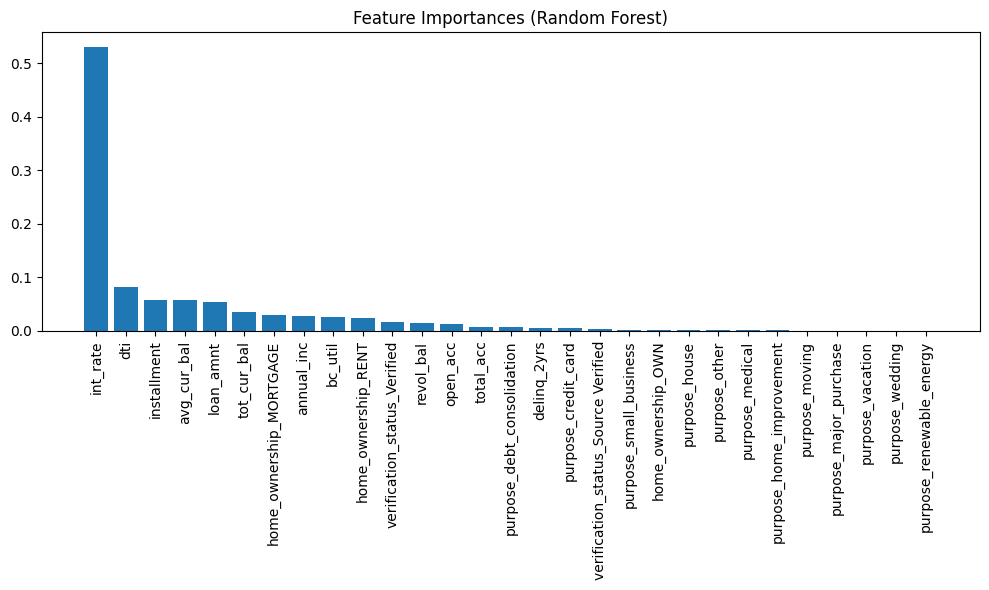

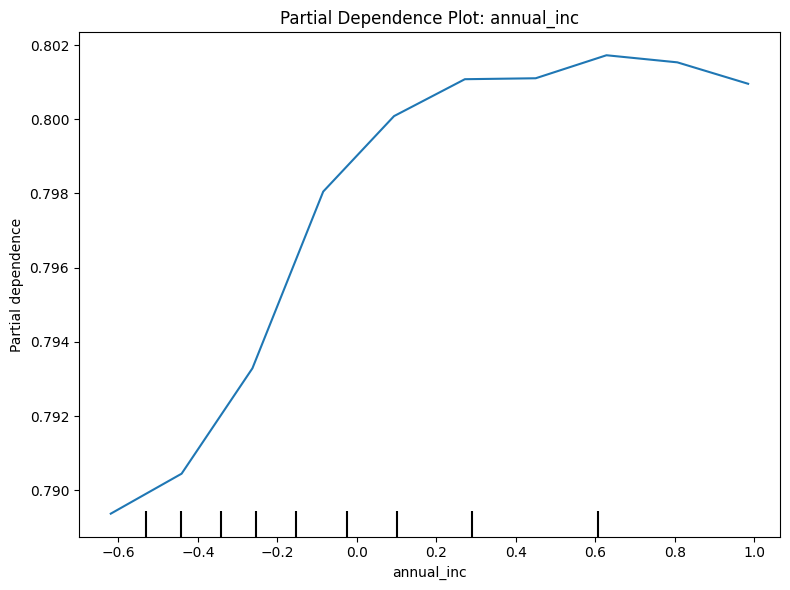

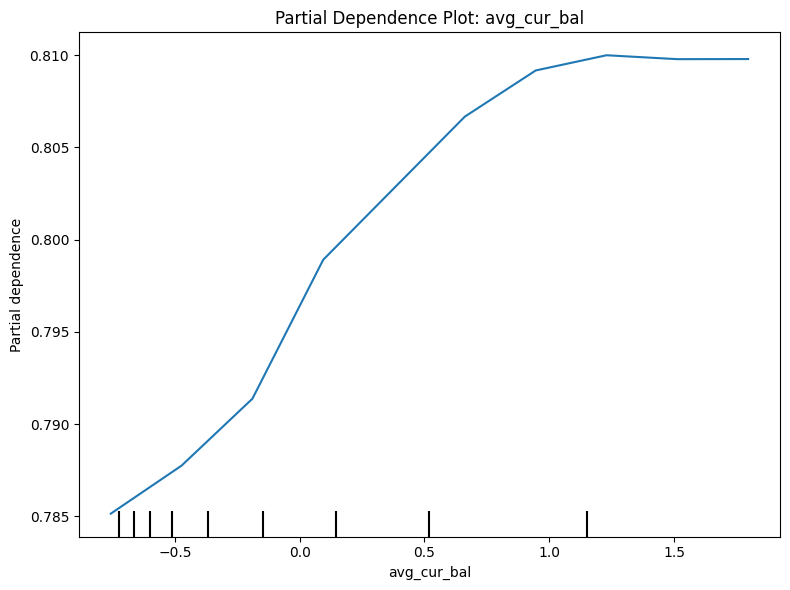

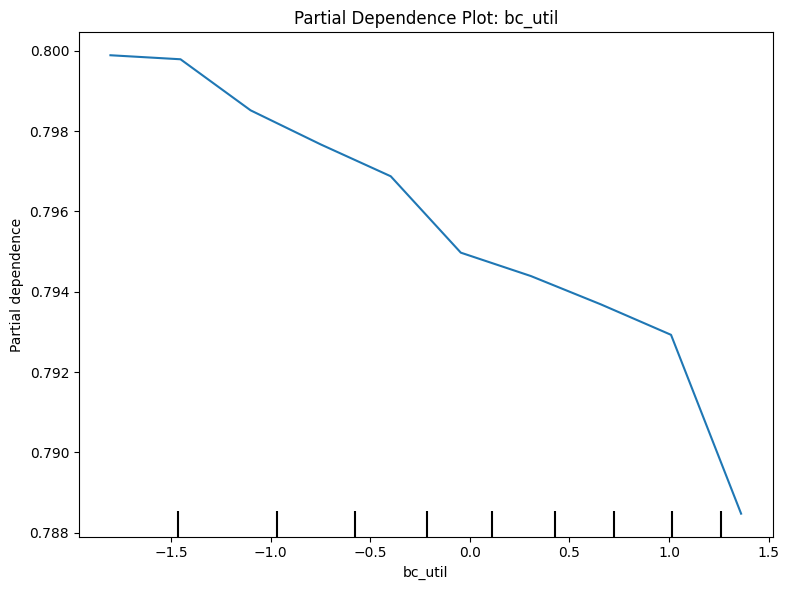

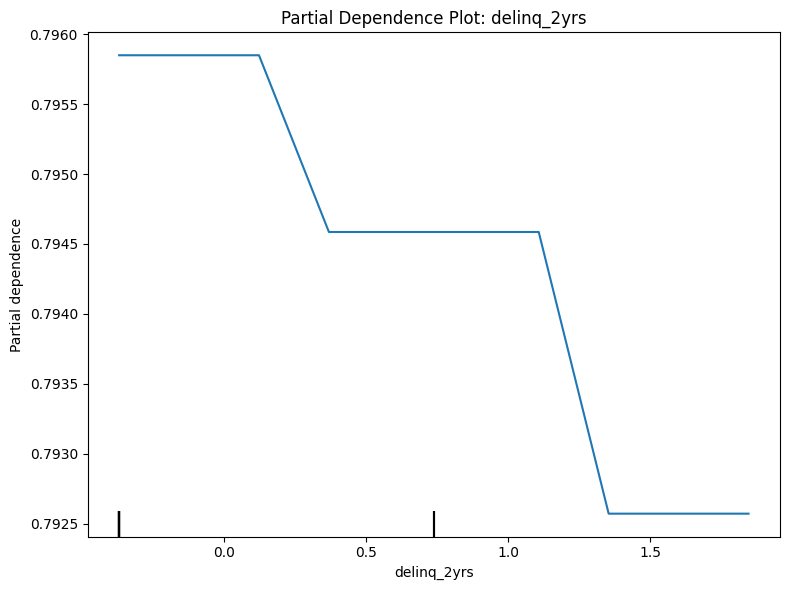

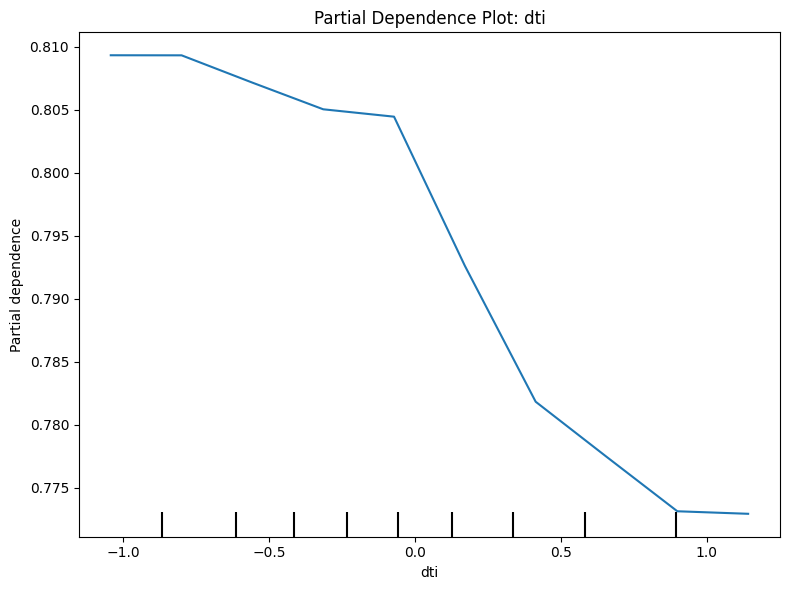

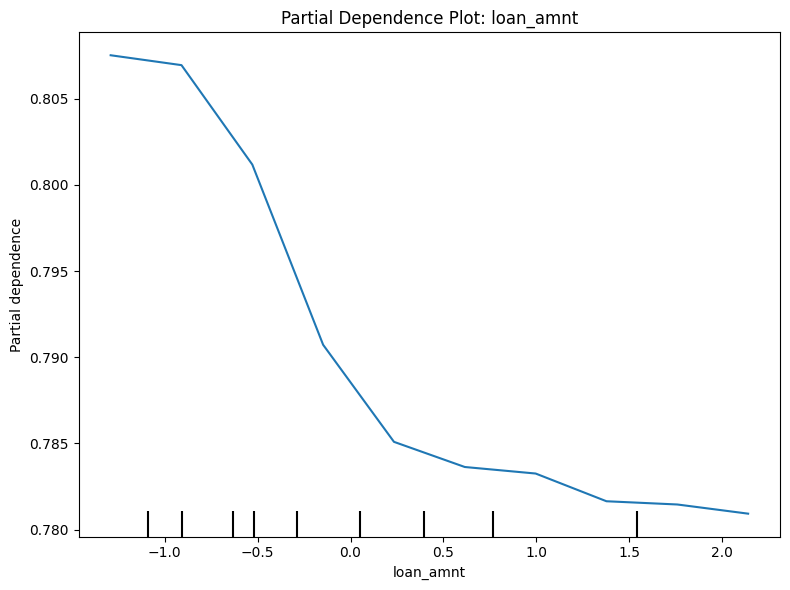

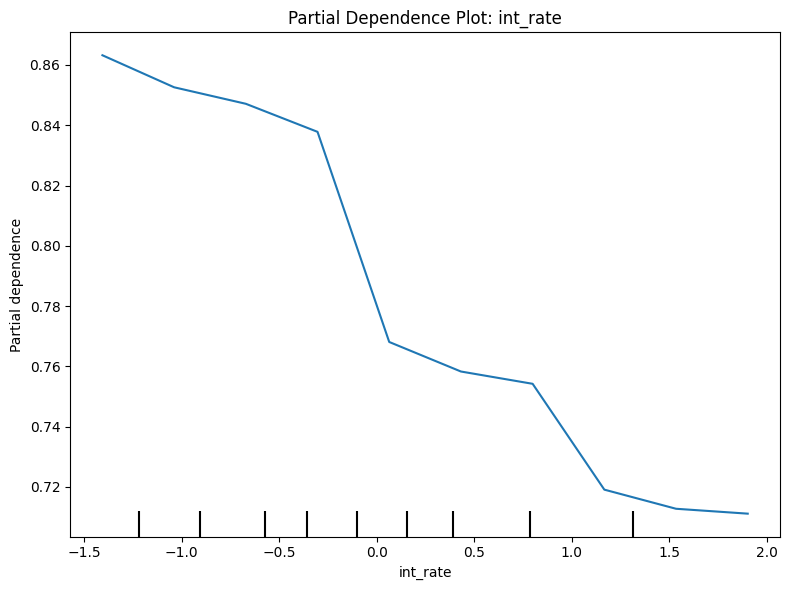

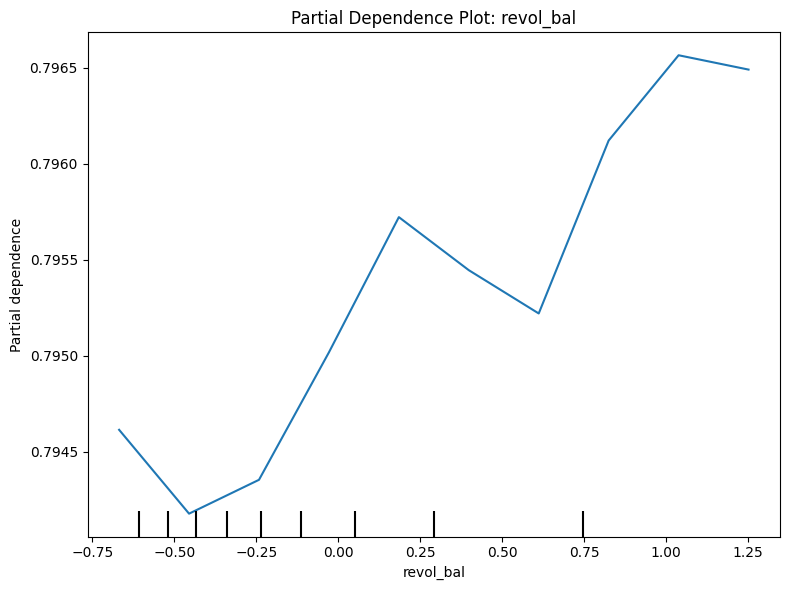

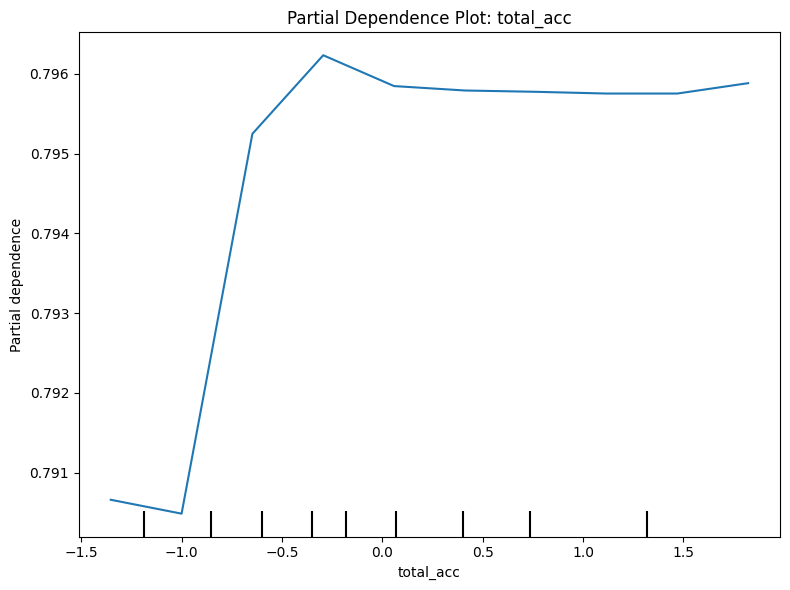

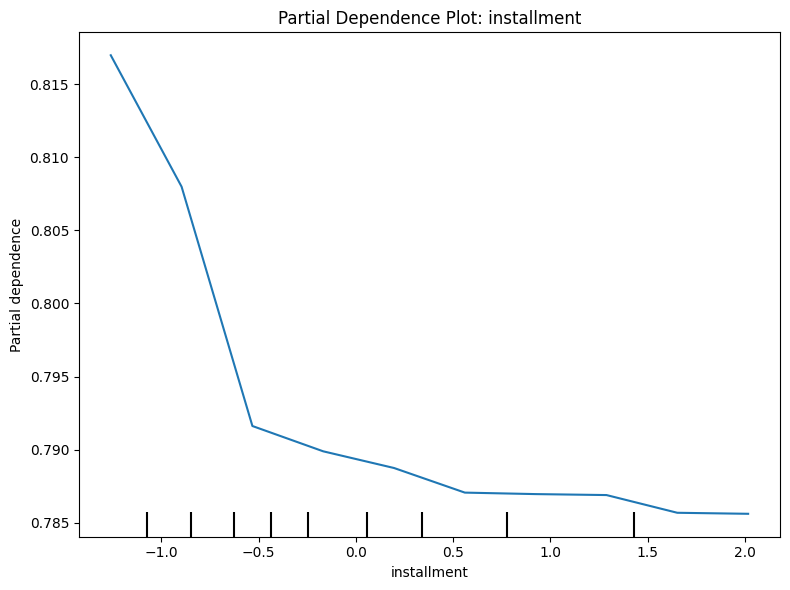

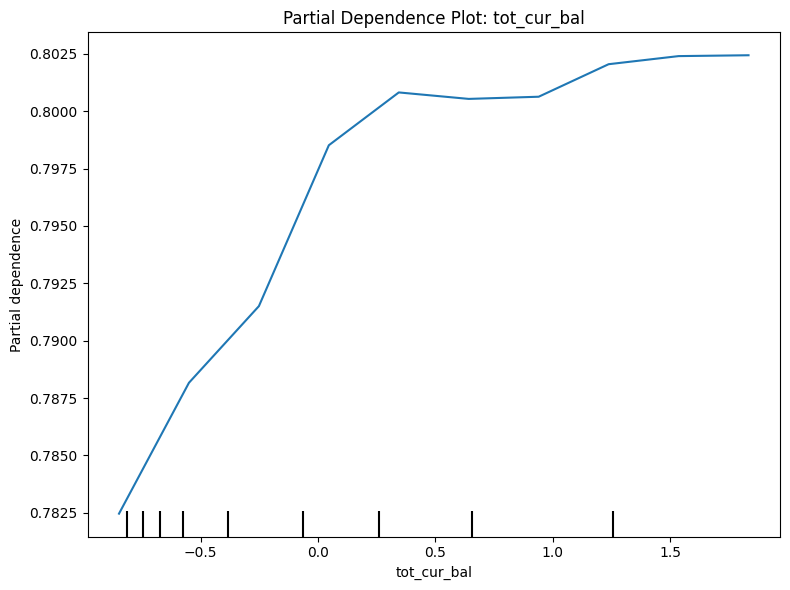

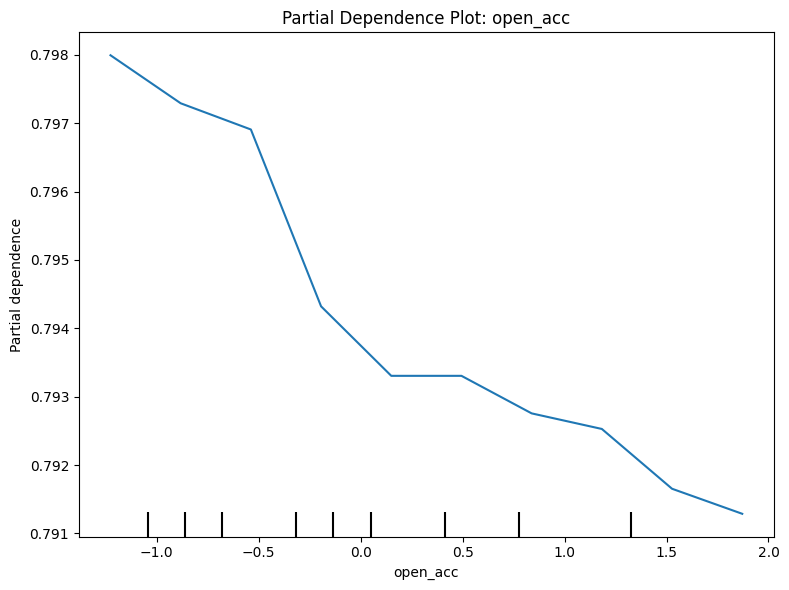

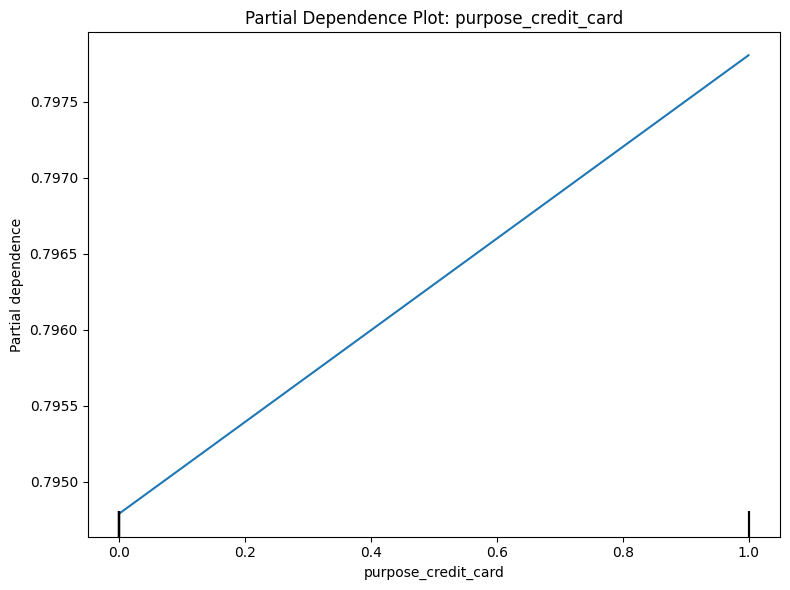

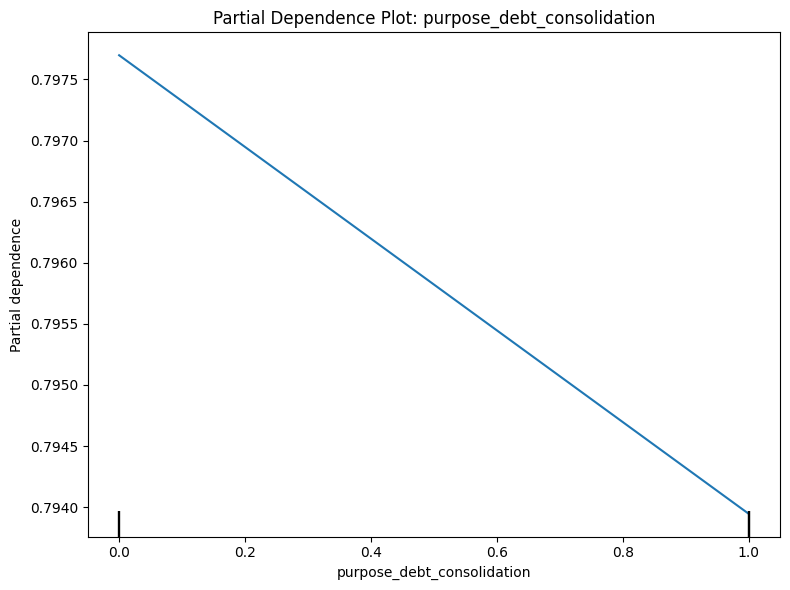

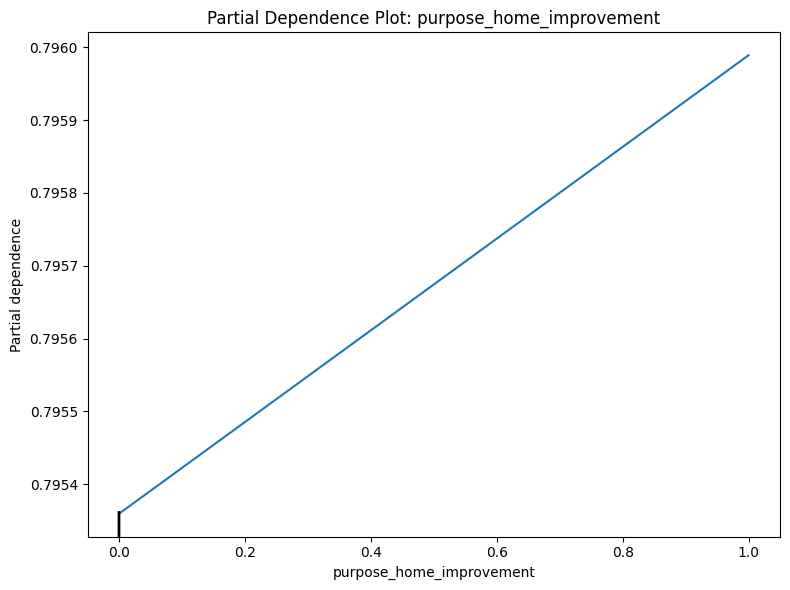

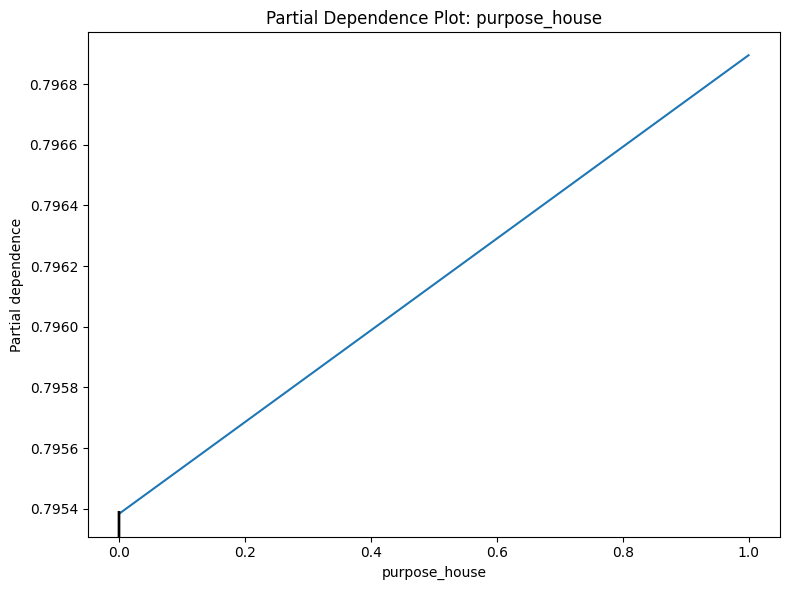

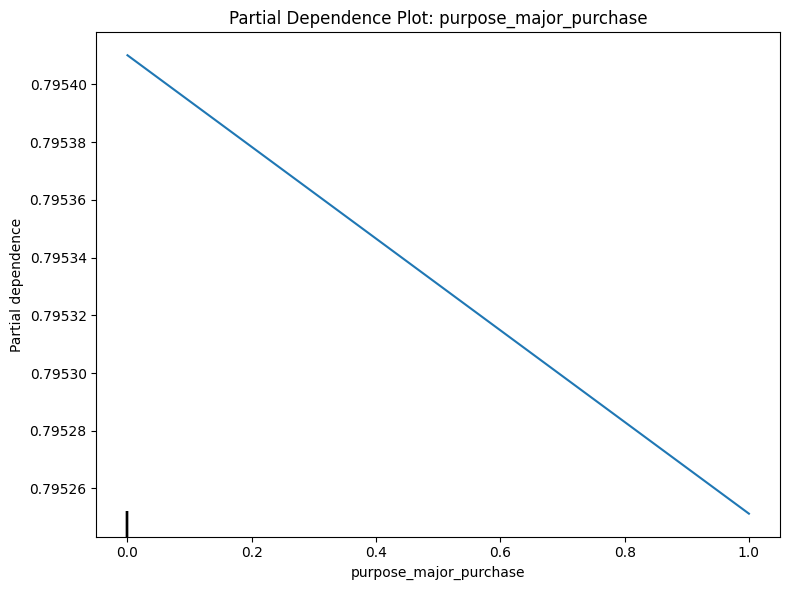

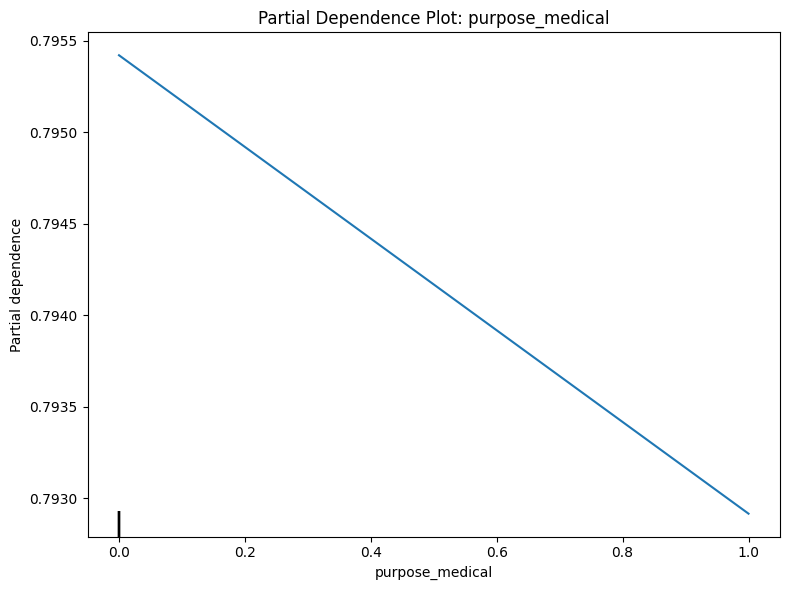

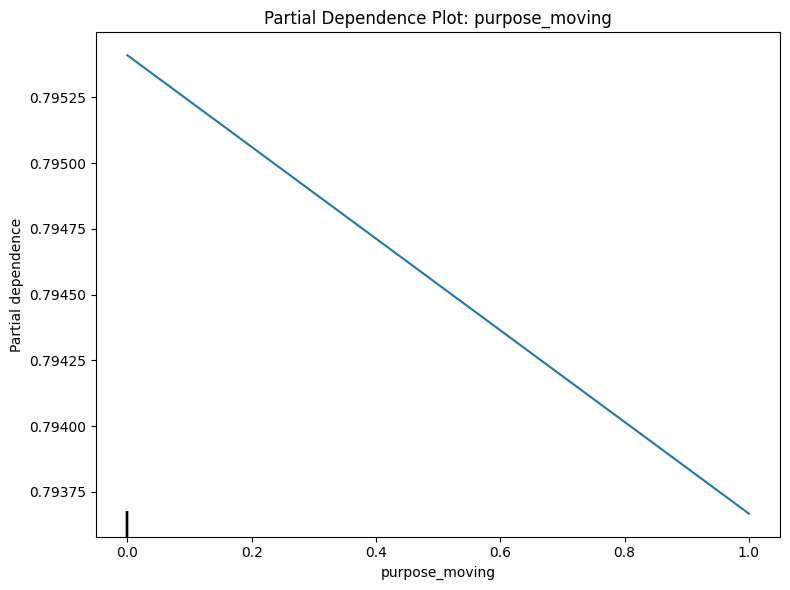

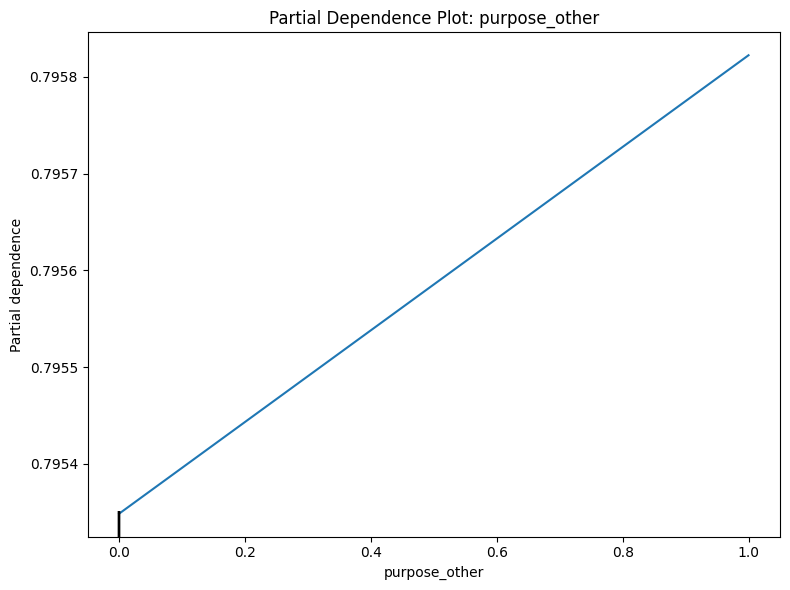

c:\Users\rbrul\Documents\GitHub\DSBA6010\.venv\Lib\site-packages\sklearn\inspection\_plot\partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


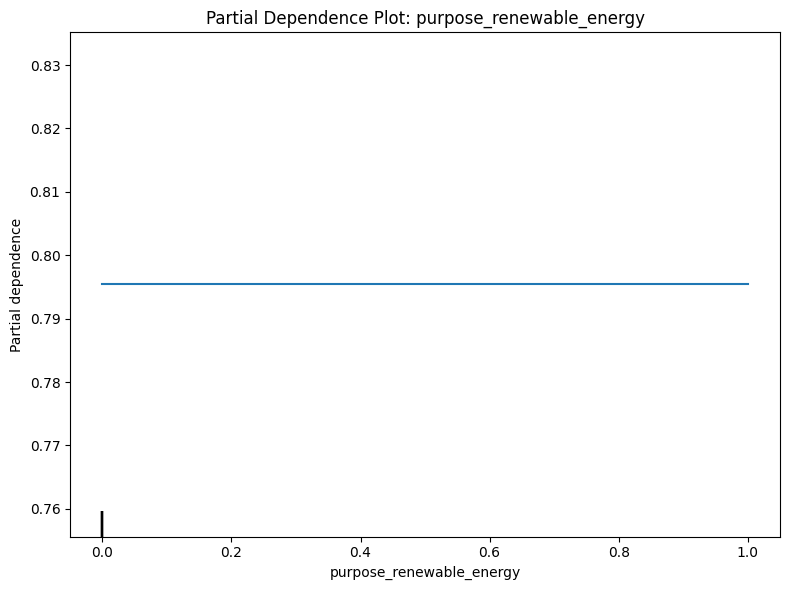

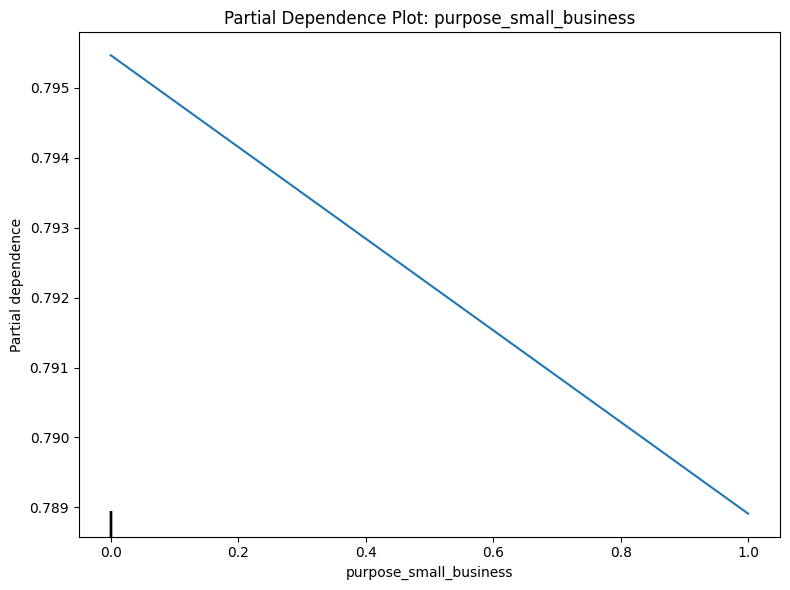

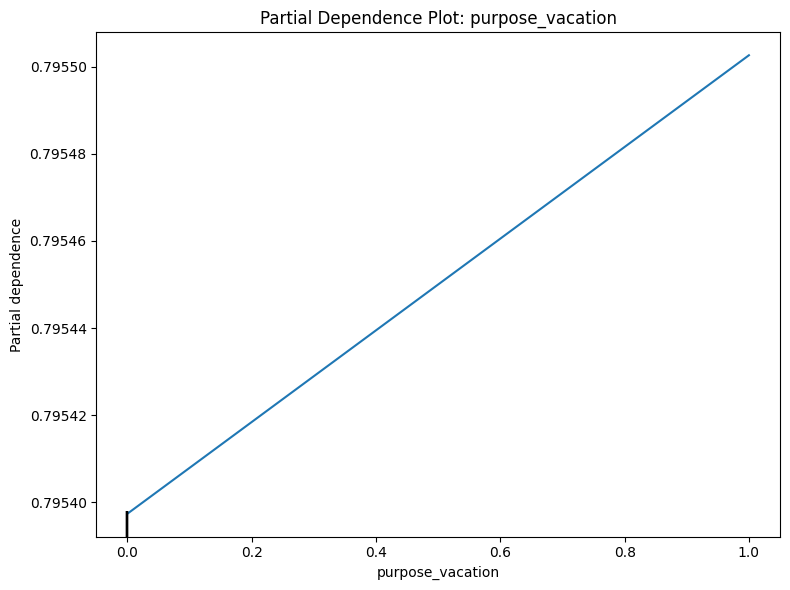

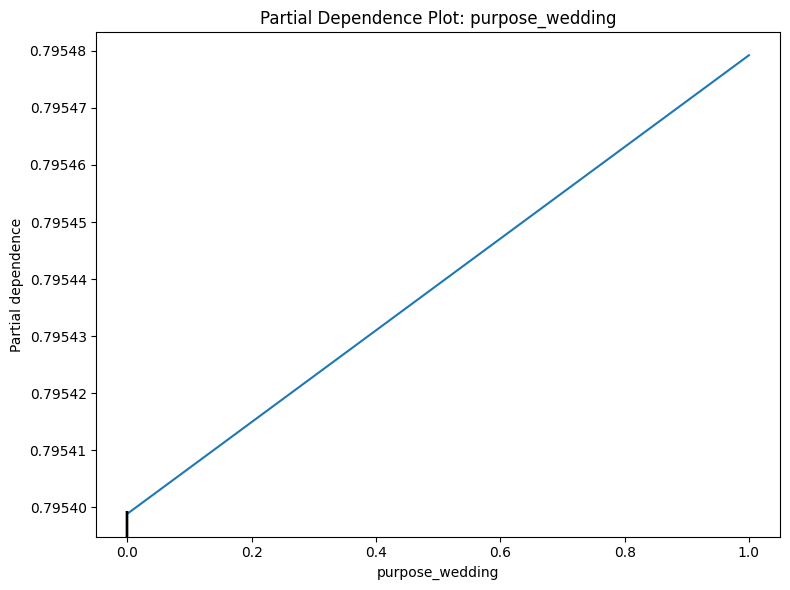

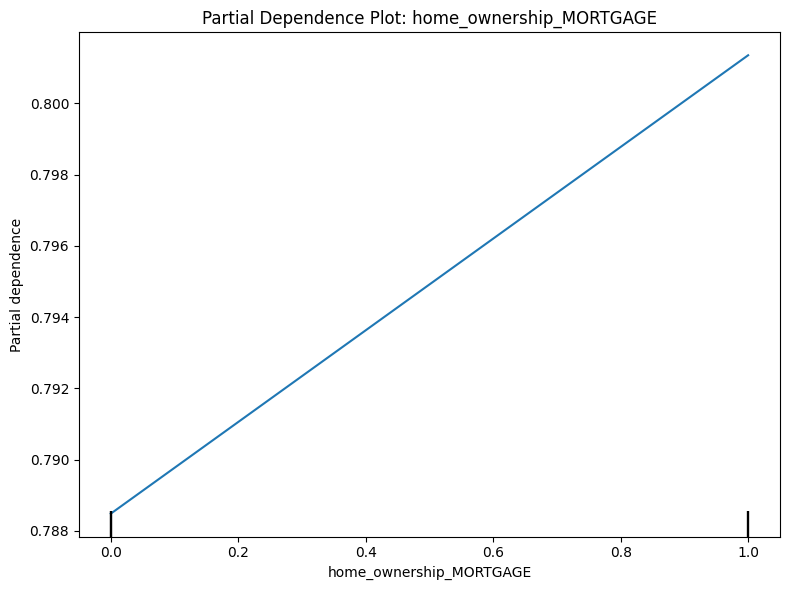

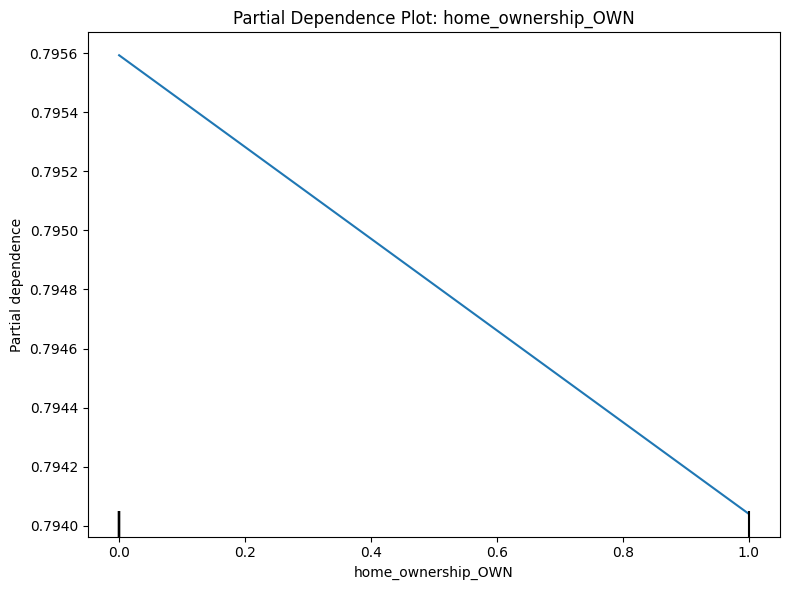

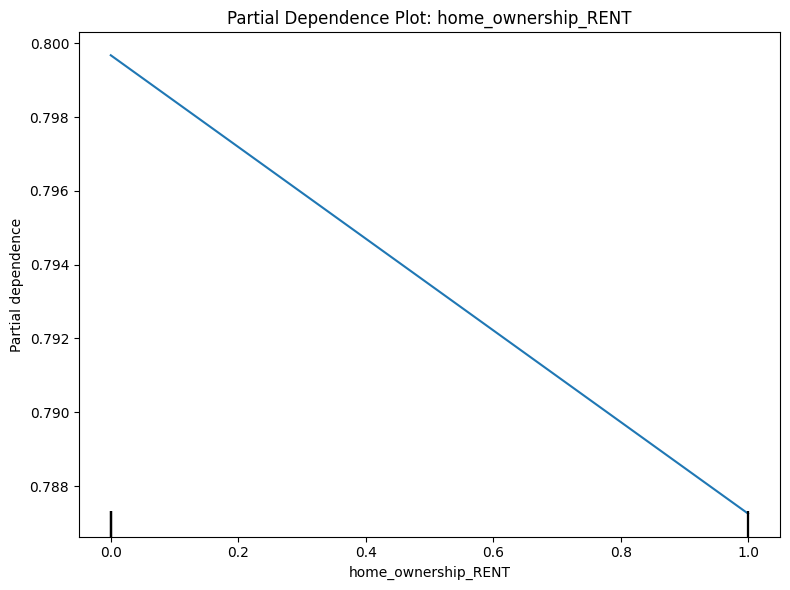

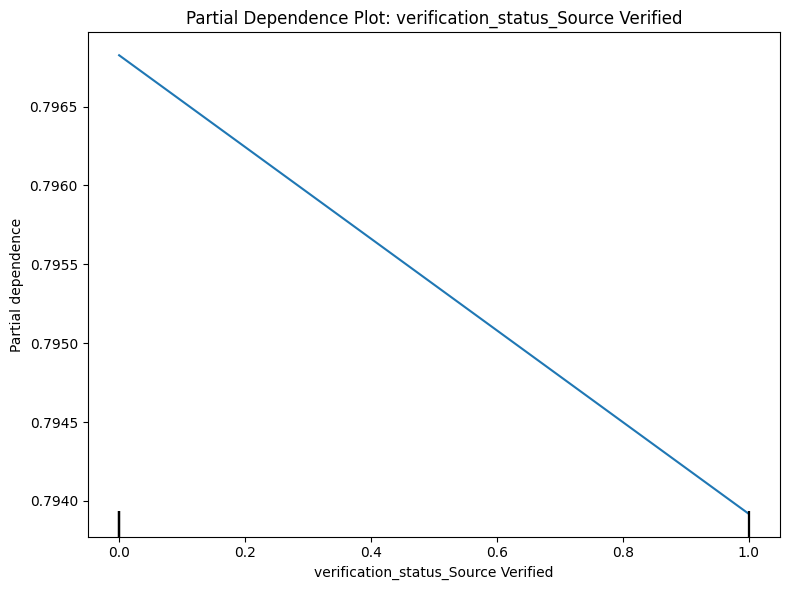

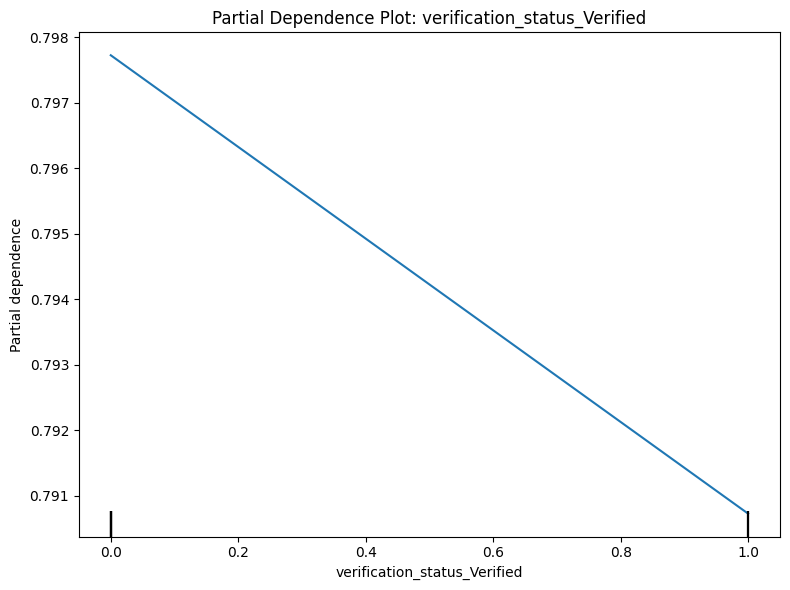

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import numpy as np

# Selecting significant columns (Intentional Flaw: Includes weakly relevant features)
significant_columns = [
    'annual_inc', 'avg_cur_bal', 'bc_util', 'delinq_2yrs', 'dti', 'loan_amnt',
    'purpose', 'home_ownership', 'verification_status', 'int_rate',
    'revol_bal', 'total_acc', 'installment', 'tot_cur_bal', 'open_acc', 'fully_paid'
]  # 'open_acc' may not be very predictive
filtered_data = data[significant_columns].copy()

# Splitting data into features (X) and target (y)
X = filtered_data.drop(columns=['fully_paid'])
y = filtered_data['fully_paid']

# Splitting data into training and test sets (Intentional Flaw: Non-stratified split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Defining categorical and numerical columns
categorical_features = ['purpose', 'home_ownership', 'verification_status']
numerical_features = [
    'annual_inc', 'avg_cur_bal', 'bc_util', 'delinq_2yrs', 'dti', 'loan_amnt',
    'int_rate', 'revol_bal', 'total_acc', 'installment', 'tot_cur_bal', 'open_acc'
]

# Preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Random Forest pipeline (Intentional Flaw: Suboptimal hyperparameters)
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=50, max_depth=5))  # Suboptimal params
])

# Train Random Forest (Intentional Flaw: No grid search for hyperparameter tuning)
random_forest_pipeline.fit(X_train, y_train)

# Predictions
y_pred_rf = random_forest_pipeline.predict(X_test)
y_pred_rf_proba = random_forest_pipeline.predict_proba(X_test)[:, 1]

# Evaluate model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf_proba)

# Output Evaluation Metrics
print("Random Forest: Accuracy =", rf_accuracy, "ROC AUC =", rf_roc_auc)

# Feature Importances from Random Forest
rf_classifier = random_forest_pipeline.named_steps['classifier']
feature_names = (
    numerical_features +
    list(random_forest_pipeline.named_steps['preprocessor']
         .transformers_[1][1]  # Categorical transformer
         .named_steps['encoder']
         .get_feature_names_out(categorical_features))
)
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Partial Dependence Plots for All Features (Intentional Flaw: Inefficient for less important features)
grid_resolution = 10

for feature_index in range(len(feature_names)):
    fig, ax = plt.subplots(figsize=(8, 6))
    PartialDependenceDisplay.from_estimator(
        random_forest_pipeline.named_steps['classifier'],
        random_forest_pipeline.named_steps['preprocessor'].transform(X_train),
        features=[feature_index],
        feature_names=feature_names,
        grid_resolution=grid_resolution,
        ax=ax
    )
    plt.title(f"Partial Dependence Plot: {feature_names[feature_index]}")
    plt.tight_layout()
    plt.show()
